# Проект "Анализ базы данных книг для приложения"

Описание и цель проекта:

Коронавирус застал мир врасплох, изменив привычный порядок вещей. На какое-то время жители городов перестали выходить на улицу, посещать кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.
Компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Первая задача — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

Задания:

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так исключим из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

Описание данных:

Таблица books
    
    Содержит данные о книгах:
        book_id — идентификатор книги;
        author_id — идентификатор автора;
        title — название книги;
        num_pages — количество страниц;
        publication_date — дата публикации книги;
        publisher_id — идентификатор издателя.

Таблица authors
    
    Содержит данные об авторах:
        author_id — идентификатор автора;
        author — имя автора.

Таблица publishers
    
    Содержит данные об издательствах:
        publisher_id — идентификатор издательства;
        publisher — название издательства;

Таблица ratings
    
    Содержит данные о пользовательских оценках книг:
        rating_id — идентификатор оценки;
        book_id — идентификатор книги;
        username — имя пользователя, оставившего оценку;
        rating — оценка книги.

Таблица reviews
    
    Содержит данные о пользовательских обзорах:
        review_id — идентификатор обзора;
        book_id — идентификатор книги;
        username — имя автора обзора;
        text — текст обзора.

Схема данных:

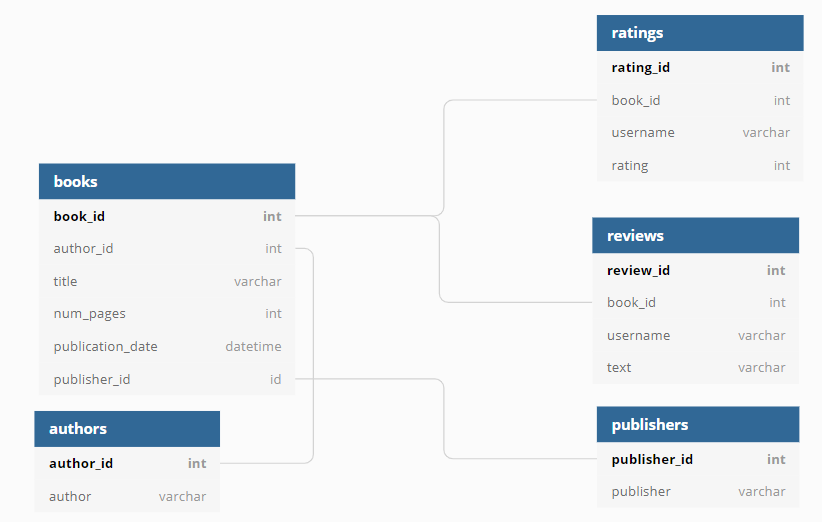

In [1]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa

# устанавливаем параметры
db_config = {
            'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db' # название базы данных
            }
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

## Вывод первых строк

In [2]:
# формируем запрос и выводим данные таблицы books
query = '''SELECT * 
           FROM books 
           LIMIT 5'''
get_sql_data(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
# формируем запрос и выводим данные таблицы authors
query = '''SELECT * 
           FROM authors 
           LIMIT 5'''
get_sql_data(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [4]:
# формируем запрос и выводим данные таблицы publishers
query = '''SELECT * 
           FROM publishers 
           LIMIT 5'''
get_sql_data(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [5]:
# формируем запрос и выводим данные таблицы ratings
query = '''SELECT * 
           FROM ratings 
           LIMIT 5'''
get_sql_data(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [6]:
# формируем запрос и выводим данные таблицы reviews
query = '''SELECT * 
           FROM reviews 
           LIMIT 5'''
get_sql_data(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Сколько книг вышло после 1 января 2000 года

In [7]:
query = '''SELECT COUNT(*) 
           FROM books 
           WHERE publication_date > '2000-01-01';'''
get_sql_data(query)

,count
0,819


После 1 января 2000 года вышло 819 книг.

## Количество обзоров и средняя оценка для каждой книги 

In [8]:
query = '''SELECT b.book_id,
                  b.title,
                  COUNT(DISTINCT rw.review_id) AS count_reviews, 
                  ROUND(AVG(rt.rating), 2) AS avg_rating
           FROM books AS b
           JOIN ratings AS rt ON rt.book_id = b.book_id
           LEFT JOIN reviews AS rw ON rw.book_id = b.book_id
           GROUP BY b.book_id, b.title
           ORDER BY count_reviews DESC;'''
get_sql_data(query)

,book_id,title,count_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.66
1,963,Water for Elephants,6,3.98
2,734,The Glass Castle,6,4.21
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
4,695,The Curious Incident of the Dog in the Night-Time,6,4.08
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
996,808,The Natural Way to Draw,0,3.00
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.00
998,221,Essential Tales and Poems,0,4.00


Книга с самым большим количеством обзоров - Twilight (Twilight #1) (средний рейтинг составляет 3.66), с самым низким количеством обзоров - Lysistrata (средний рейтинг составляет 4).

## Издательство, которое выпустило наибольшее число книг толще 50 страниц 

In [9]:
query = '''SELECT publisher,
           COUNT(b.book_id) AS count_books
           FROM publishers AS p 
           JOIN books AS b ON p.publisher_id=b.publisher_id
           WHERE b.num_pages > 50
           GROUP BY publisher 
           ORDER BY count_books DESC
           LIMIT 1;'''
get_sql_data(query)

,publisher,count_books
0,Penguin Books,42


Издательство Penguin Books выпустило набольшее число книг толще 50 страниц, а именно 42 книги.

## Автор с самой высокой средней оценкой книг (только книги с 50 и более оценками)

In [10]:
query = '''SELECT a.author_id,
                  a.author,
                  ROUND(AVG(rt.rating), 2) AS avg_rating,
                  COUNT(rt.rating) AS count_rating
           FROM authors AS a
           JOIN books AS b ON b.author_id = a.author_id
           JOIN ratings AS rt ON rt.book_id = b.book_id
           GROUP BY a.author_id,
                    a.author
           HAVING COUNT(rt.rating) >= 50 
           ORDER BY count_rating DESC
           LIMIT 1;'''
get_sql_data(query)

,author_id,author,avg_rating,count_rating
0,236,J.K. Rowling/Mary GrandPré,4.29,312


Автором с самой высокой средней оценкой книг (только книги с 50 и более оценками) является J.K. Rowling/Mary GrandPré, средняя оценка ее книг - 4.29.

## Среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [11]:
query = ''' 
WITH
a AS (
    SELECT username
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id) > 48
),

b AS (
    SELECT username,
           COUNT(review_id) AS count_review
    FROM reviews 
    GROUP BY username
),

c AS (
    SELECT a.username,
           b.count_review
    FROM a 
    JOIN b ON a.username = b.username
)

SELECT AVG(c.count_review) AS avg_review
FROM c;
'''
get_sql_data(query)

,avg_review
0,24.0


Среднее количество обзоров от пользователей, которые поставили больше 48 оценок составляет 24.

## Вывод

Проанализировав базу данных было выяснено:
- После 1 января 2000 года вышло 819 книг;
- Книга с самым большим количеством обзоров - Twilight (Twilight #1) (средний рейтинг составляет 3.66), с самым низким количеством обзоров - Lysistrata (средний рейтинг составляет 4);
- Издательство Penguin Books выпустило набольшее число книг толще 50 страниц, а именно 42 книги;
- Автором с самой высокой средней оценкой книг (только книги с 50 и более оценками) является J.K. Rowling/Mary GrandPré, средняя оценка ее книг - 4.29;
- Среднее количество обзоров от пользователей, которые поставили больше 48 оценок составляет 24.

Спасибо за внимание!